# KHUDA 9기 파이썬 세션 - 영화 흥행 예측 프로젝트

## 2026.02.12(목)

# KHUDA 9기 파이썬 세션 실습

## 오늘의 미션

여러분은 지금부터 **영화 데이터 분석가**입니다!

**팀장의 요청:**
> "5000편의 영화 데이터가 있어요.  
> 이 데이터를 정리해서 다음 주에 AI 모델을 학습시킬 수 있게 준비해주세요!"

오늘 할 일:<br>
1. 데이터 로드: 영화 데이터 불러오기
2. 데이터 탐색: 퀴즈 정답 찾기 (EDA)
3. 데이터 전처리 1: 결측치(비어있는 값) 처리하기
4. 데이터 전처리 2: 상관관계 분석을 통한 핵심 특성 선택하기

## Step 1: 라이브러리 불러오기

데이터 분석에 필요한 도구들을 불러옵니다.

In [1]:
# 데이터 처리용
import pandas as pd
import numpy as np

# 시각화용
import matplotlib.pyplot as plt
import seaborn as sns

# 그래프 설정
plt.style.use('default')
sns.set_palette('husl')

## Step 2: 데이터 불러오기

TMDB 영화 5000편 데이터를 불러옵니다.

**데이터 정보:**
- 영화 5000편
- 예산, 수익, 인기도, 평점 등의 정보 포함

In [2]:
import pandas as pd
import requests
import io

url = 'https://raw.githubusercontent.com/kwang-i-coder/KHUDA-9th-Python/refs/heads/main/week3/tmdb_5000_movies.csv'

response = requests.get(url, verify=False)
df = pd.read_csv(io.StringIO(response.text))

print("데이터 불러오기 완료!")
print(f"총 {len(df)}개의 영화 데이터")

/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'raw.githubusercontent.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


데이터 불러오기 완료!
총 4803개의 영화 데이터


## Step 3: 데이터 탐색하기

데이터가 어떻게 생겼는지 확인해봅시다!

### 3-1. 처음 5개 행 보기

In [3]:
# 데이터 미리보기
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


### 3-2. 데이터 정보 확인

In [4]:
# 컬럼 정보, 데이터 타입, 결측치 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

### 3-3. 통계 정보 확인

In [5]:
# 숫자 컬럼들의 통계 정보
df.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


## 퀴즈 정답 확인!

PPT에서 본 퀴즈의 정답을 데이터에서 직접 찾아봅시다!

### 퀴즈 1: 가장 예산이 많이 든 영화는?

In [6]:
# 예산이 가장 높은 영화 찾기
max_budget_idx = df['budget'].idxmax()
max_budget_movie = df.loc[max_budget_idx]

print("예산 1위 영화:")
print(f"제목: {max_budget_movie['title']}")
print(f"예산: ${max_budget_movie['budget']:,.0f}")
print(f"수익: ${max_budget_movie['revenue']:,.0f}")

예산 1위 영화:
제목: Pirates of the Caribbean: On Stranger Tides
예산: $380,000,000
수익: $1,045,713,802


### 퀴즈 2: 역대 최고 흥행작은?

In [7]:
# 수익이 가장 높은 영화 찾기
max_revenue_idx = df['revenue'].idxmax()
max_revenue_movie = df.loc[max_revenue_idx]

print("흥행 1위 영화:")
print(f"제목: {max_revenue_movie['title']}")
print(f"수익: ${max_revenue_movie['revenue']:,.0f}")
print(f"예산: ${max_revenue_movie['budget']:,.0f}")

흥행 1위 영화:
제목: Avatar
수익: $2,787,965,087
예산: $237,000,000


### 3-4. 시각화로 데이터 이해하기

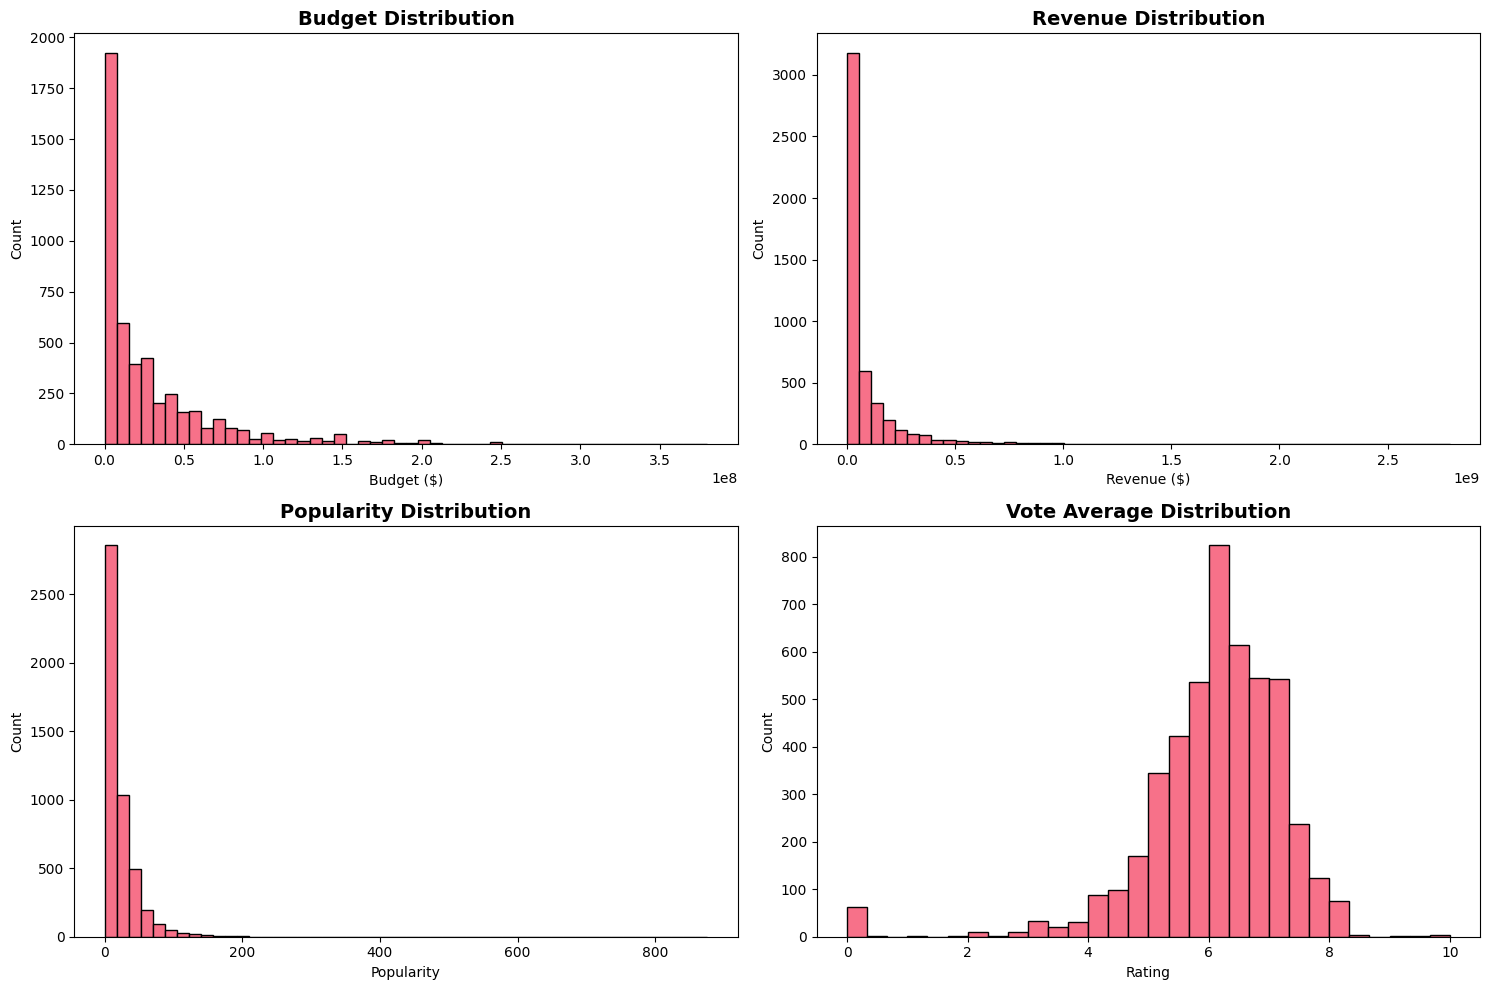

In [8]:
# 주요 컬럼들의 분포 확인
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 예산 분포
axes[0, 0].hist(df['budget'].dropna(), bins=50, edgecolor='black')
axes[0, 0].set_title('Budget Distribution', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Budget ($)')
axes[0, 0].set_ylabel('Count')

# 수익 분포
axes[0, 1].hist(df['revenue'].dropna(), bins=50, edgecolor='black')
axes[0, 1].set_title('Revenue Distribution', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Revenue ($)')
axes[0, 1].set_ylabel('Count')

# 인기도 분포
axes[1, 0].hist(df['popularity'].dropna(), bins=50, edgecolor='black')
axes[1, 0].set_title('Popularity Distribution', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Popularity')
axes[1, 0].set_ylabel('Count')

# 평점 분포
axes[1, 1].hist(df['vote_average'].dropna(), bins=30, edgecolor='black')
axes[1, 1].set_title('Vote Average Distribution', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Rating')
axes[1, 1].set_ylabel('Count')

plt.tight_layout()
plt.show()

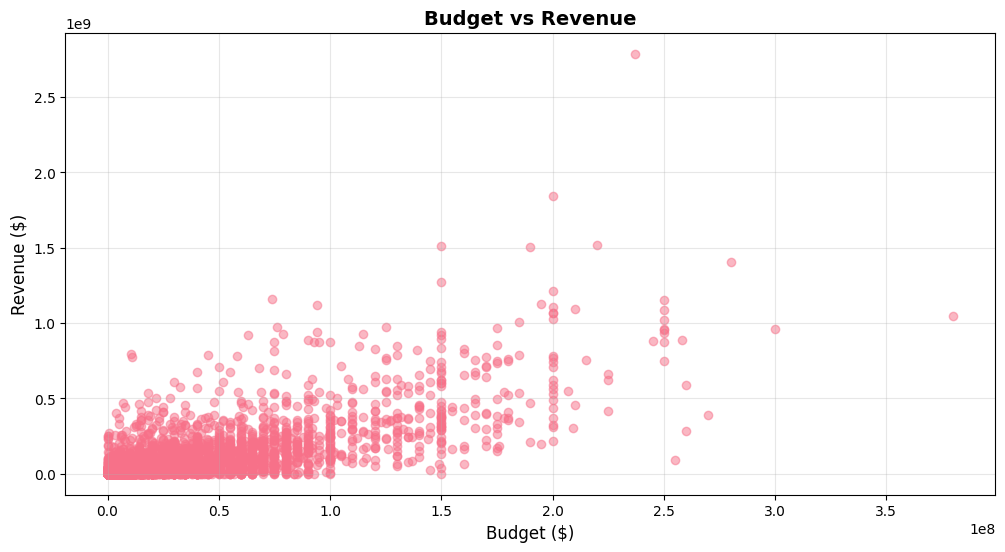

예산이 많을수록 수익이 높을까요?


In [9]:
# 예산 vs 수익 관계
plt.figure(figsize=(12, 6))
plt.scatter(df['budget'], df['revenue'], alpha=0.5)
plt.xlabel('Budget ($)', fontsize=12)
plt.ylabel('Revenue ($)', fontsize=12)
plt.title('Budget vs Revenue', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.show()

print("예산이 많을수록 수익이 높을까요?")

## Step 4: 데이터 전처리 - 결측치 처리 데이터에 비어있는 값(결측치)이 있는지 확인하고 처리합니다.

왜 중요할까요?

모델은 비어있는 값을 처리할 수 없어요.

결측치를 그대로 두면 학습 과정에서 에러가 발생합니다.

### 4-1. 결측치 확인

결측치 현황:
budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64



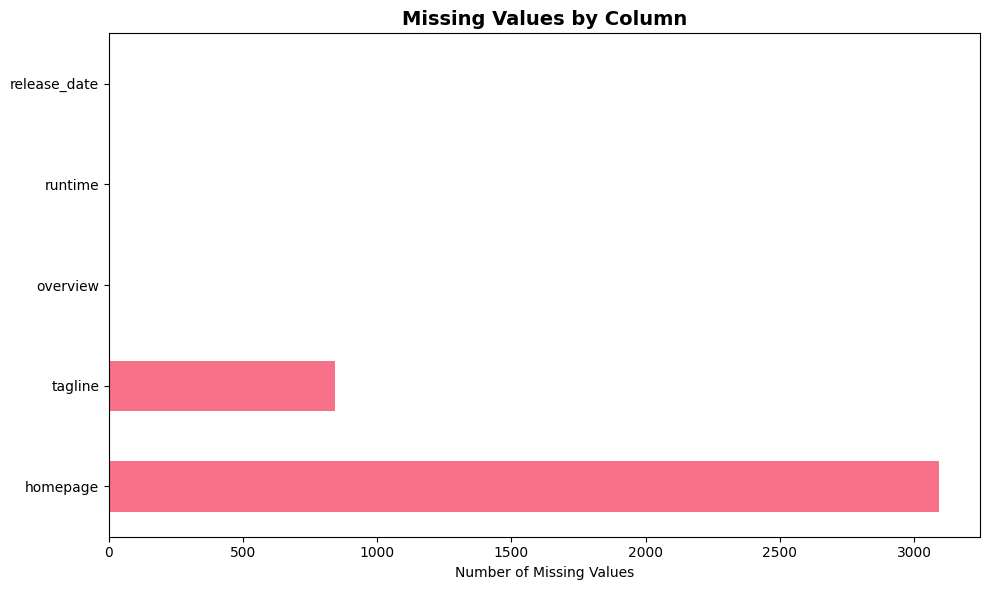

In [10]:
# 각 컬럼별 결측치 개수 확인
print("결측치 현황:")
print(df.isnull().sum())
print("\n" + "="*50)

# 시각화
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)

if len(missing) > 0:
    plt.figure(figsize=(10, 6))
    missing.plot(kind='barh')
    plt.title('Missing Values by Column', fontsize=14, fontweight='bold')
    plt.xlabel('Number of Missing Values')
    plt.tight_layout()
    plt.show()
else:
    print("결측치가 없습니다!")

### 4-2. 결측치 처리하기

결측치 처리 방법:
1. `dropna()`: 결측치가 있는 행을 삭제

In [36]:
# 중요한 컬럼(budget, revenue)에 결측치가 있는 행 삭제

df_clean = df.dropna(subset=['budget','revenue'])

print(f"전처리 전: {len(df)}개 영화")
print(f"전처리 후: {len(df_clean)}개 영화")
print(f"제거된 데이터: {len(df) - len(df_clean)}개")

전처리 전: 4803개 영화
전처리 후: 4803개 영화
제거된 데이터: 0개


### 4-3. 이상한 데이터 제거하기

dropna()로 빈칸은 없앴지만, 확인해보니 예산이나 수익이 0원인 영화들이 있습니다. 이러한 값들은 모델 학습에 방해하므로 제거해야 합니다

In [37]:
# TODO: budget과 revenue가 0보다 큰 데이터만 필터링하세요.
# 힌트: 판다스의 조건문 df[ (조건1) & (조건2) ]
df_clean = df_clean[(df_clean['budget'] > 0) & (df_clean['revenue'] > 0)]

print(f" 가짜 데이터 제거 후 남은 영화: {len(df_clean)}개")

 가짜 데이터 제거 후 남은 영화: 3229개


## Step 5: 데이터 전처리 - 상관관계 분석 및 특성 선택 무작정 특성을 고르는 게 아니라, 통계적으로 수익과 관련이 깊은 특성을 찾아봅시다.

.corr() 함수를 사용해 각 컬럼 간의 상관계수를 출력해보세요.

revenue와 상관계수가 높은 상위 3개 핵심 특성(컬럼)을 찾아 features 리스트에 넣으세요.

In [38]:
# 1. 상관계수 확인하기 (숫자형 데이터만 선택)
numeric_df = df_clean.select_dtypes(include=['number'])
correlation = numeric_df.corr()['revenue'].sort_values(ascending=False)

print("수익(revenue)과 각 특성의 상관관계:")
print(correlation)

수익(revenue)과 각 특성의 상관관계:
revenue         1.000000
vote_count      0.756210
budget          0.705399
popularity      0.602246
runtime         0.233074
vote_average    0.187839
id              0.030112
Name: revenue, dtype: float64


In [40]:
# TODO: 위 결과를 보고, revenue를 제외하고 상관계수가 0.6 이상인 상위 3개 컬럼을 적으세요.
features = ['vote_count', 'budget', 'popularity']

X = df_clean[features]
y = df_clean['revenue']

print(f"선택된 특성: {features}")

선택된 특성: ['vote_count', 'budget', 'popularity']


### 5-1. 선택한 데이터 확인

In [41]:
# 특성 데이터 확인
print("=== 특성(X) 데이터 ===")
display(X.head())

print("\n=== 타겟(y) 데이터 ===")
print(y.head())

=== 특성(X) 데이터 ===


,vote_count,budget,popularity
0,11800,237000000,150.437577
1,4500,300000000,139.082615
2,4466,245000000,107.376788
3,9106,250000000,112.312950
4,2124,260000000,43.926995



=== 타겟(y) 데이터 ===
0    2787965087
1     961000000
2     880674609
3    1084939099
4     284139100
Name: revenue, dtype: int64


### 5-2. 결측치 한 번 더 확인

In [42]:
# 선택한 특성에 결측치가 남아있는지 확인
print("특성별 결측치:")
print(X.isnull().sum())

# 만약 결측치가 있다면 추가 처리
if X.isnull().sum().sum() > 0:
    print("\n결측치가 발견되었습니다. 추가 처리를 진행합니다.")
    X = X.dropna()
    y = y[X.index]
    print(f"처리 후 데이터 개수: {len(X)}개")
else:
    print("\n결측치가 없습니다!")

특성별 결측치:
vote_count    0
budget        0
popularity    0
dtype: int64

결측치가 없습니다!


## Step 6: 데이터 저장하기

다음 주에 사용할 수 있도록 전처리된 데이터를 저장합니다.

In [43]:
# 전처리된 데이터를 하나의 DataFrame으로 합치기
df_final = X.copy()
df_final['revenue'] = y

# CSV 파일로 저장
df_final.to_csv('movies_preprocessed.csv', index=False)

print("전처리된 데이터 저장 완료!")
print(f"파일명: movies_preprocessed.csv")
print(f"저장된 데이터: {len(df_final)}개 영화, {len(df_final.columns)}개 컬럼")

전처리된 데이터 저장 완료!
파일명: movies_preprocessed.csv
저장된 데이터: 3229개 영화, 4개 컬럼


### 과제 (선택)
1. 다른 결측치 처리 방법 시도해보기 (`fillna()`)
2. 다른 특성 추가해보기 (예: `vote_count`)